**Finite differences in options pricing**

Finite difference methods for option pricing are numerical methods used in mathematical finance for the valuation of options. They were first applied to option pricing by Eduardo Schwartz in 1977.  They are used to price options by approximating the (continuous-time) differential equation that describes how an option price evolves over time by a set of (discrete-time) difference equations. The discrete difference equations may then be solved iteratively to calculate a price for the option. The approach arises since the evolution of the option value can be modelled via a partial differential equation (PDE), as a function of (at least) time and price of underlying; e.g. Black–Scholes PDE. Once in this form, a finite difference model can be derived, and the valuation obtained.

Finite difference schemes are very much similar to trinomial tree options pricing, where each node is dependent on three other nodes with an up movement, a down movement, and a flat movement. The motivation behind the finite differencing is the application of the Black-Scholes Partial Differential Equation (PDE) framework (involving functions and their partial derivatives) whose price $S (t )$ is a function of $f (S,t )$ , with $r$ as the risk-free rate, $t$ as the time to maturity, and $\sigma$ as the volatility
of the underlying security:  \\
${\displaystyle{\frac {\partial f}{\partial t}}+{\frac {1}{2}}\sigma ^{2}S^{2}{\frac {\partial ^{2}f}{\partial S^{2}}}+rS{\frac {\partial f}{\partial S}}-rf=0}$

where $f$ is the price of the option as a function of stock price $S$ and time $t$, $r$ is the risk-free interest rate, and ${\displaystyle \sigma }$  is the volatility of the stock.

The finite difference technique tends to converge faster than lattices and
approximates complex exotic options very well. To solve a PDE by finite differences working backward in time, a discrete-time grid of size $M$ by $N$ is set up to reflect asset prices over a course of time, such that $S$ and $t$ take on the following values at each point on the grid:

In [1]:
""" Shared attributes and functions of FD """
import numpy as np
class FiniteDifferences(object):
    def __init__(self, S0, K, r, T, sigma, Smax, M, N, is_call=True):
      self.S0 = S0
      self.K = K
      self.r = r
      self.T = T
      self.sigma = sigma
      self.Smax = Smax
      self.M, self.N = int(M), int(N) # Ensure M&N are integers
      self.is_call = is_call
      self.dS = Smax / float(self.M)
      self.dt = T / float(self.N)
      self.i_values = np.arange(self.M)
      self.j_values = np.arange(self.N)
      self.grid = np.zeros(shape=(self.M+1, self.N+1))
      self.boundary_conds = np.linspace(0, Smax, self.M+1)
    def _setup_boundary_conditions_(self):
      pass
    def _setup_coefficients_(self):
      pass
    def _traverse_grid_(self):
      #""" Iterate the grid backwards in time """
      pass
    def _interpolate_(self):
    #"""
    #Use piecewise linear interpolation on the initial
    #grid column to get the closest price at S0.
    #"""
      return np.interp(self.S0, self.boundary_conds, self.grid[:, 0])
    def price(self):
      self._setup_boundary_conditions_()
      self._setup_coefficients_()
      self._traverse_grid_()
      return self._interpolate_()

From the above;

_setup_boundary_conditions_: This method sets up the boundary conditions of the grid structure as a NumPy two-dimensional array.

_setup_coefficients_: This method sets up the necessary coefficients used for traversing the grid structure

_traverse_grid_: This method iterates the grid structure backward in time,
storing the calculated values toward the first column of the grid

_interpolate_: Using the final calculated values on the first column of the
grid, this method will interpolate these values to find the option price that
closely infers the initial stock price, $S_0$


The Python implementation of finite differences by the explicit method is given in the following FDExplicitEu class, which inherits from the FiniteDifferences
class and overrides the required implementation methods.

In [2]:
""" Explicit method of Finite Differences """
import numpy as np
class FDExplicitEu(FiniteDifferences):
  def _setup_boundary_conditions_(self):
    if self.is_call:
     self.grid[:, -1] = np.maximum(
     self.boundary_conds - self.K, 0)
     self.grid[-1, :-1] = (self.Smax - self.K) * np.exp(-self.r *self.dt *
                                                      (self.N-self.j_values))
    else:
      self.grid[:, -1] = np.maximum(self.K-self.boundary_conds, 0)
      self.grid[0, :-1] = (self.K - self.Smax) * np.exp(-self.r *self.dt * 
                                                       (self.N-self.j_values))
     
  def _setup_coefficients_(self):
    self.a = 0.5*self.dt*((self.sigma**2) * (self.i_values**2) - 
                          self.r*self.i_values)
    self.b = 1 - self.dt*((self.sigma**2) * (self.i_values**2) + self.r)
    self.c = 0.5*self.dt*((self.sigma**2) * (self.i_values**2) + self.r*
                                                          self.i_values)
  def _traverse_grid_(self):
    for j in reversed(self.j_values):
      for i in range(self.M)[2:]:
        self.grid[i,j] = self.a[i]*self.grid[i-1,j+1] + self.b[i]* self.grid[i,j+1] + self.c[i]*self.grid[i+1,j+1]


On completion of traversing the grid structure, the first column contains the present value of the initial asset prices at $t=0$. The interp function of NumPy is used to perform a linear interpolation to approximate the option value.  \\

Besides using linear interpolation as the most common choice for the interpolation method, the other methods such as the spline or cubic may be used to approximate the option value. Consider the example of an European put option. The underlying stock price is $\$10$ with a volatility of 20 percent. The strike price of the put option is $\$10$ with an expiration time of $0.5$ years. The risk-free rate is $5$ percent. We can price the option using the explicit method with a Smax value of 10, an M value of 30, and N value of 100:

In [3]:
#from FDExplicitEu import FDExplicitEu
option = FDExplicitEu(10, 10, 0.05, 6./12., 0.2, 20, 30, 100, False)
print(option.price())


0.4263717421812661


What happens when other values of M and N are chosen improperly?

In [170]:
import numpy as np
import matplotlib.pyplot as plt

M = np.random.choice([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101])
option_e = FDExplicitEu(10, 10, 0.05, 6./12., 0.2, 20, M, 100, False)
print(option_e.price(), M)

0.5682304812680767 11


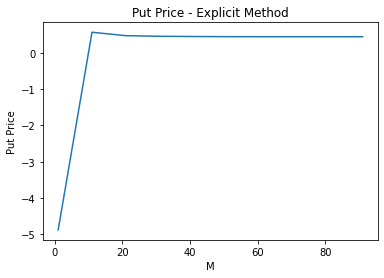

In [207]:
import pandas as pd
M = pd.DataFrame([1,11,21,31,41,51,61,71,81,91])
put_price_em = pd.DataFrame([-4.8765495601416635, 0.5682304812680767, 0.4738916307914912, 
                  0.4566735368510726, 0.4506164408858425, 0.4462367375126475, 
                  0.4452971850946051, 0.44468460709777424, 0.4442631002830333, 
                  0.4439607061673019])
plt.plot(M, put_price_em)
plt.title('Put Price - Explicit Method')
plt.xlabel('M')
plt.ylabel('Put Price')
plt.show()


In [205]:
N = np.random.choice([10, 110, 210, 310, 410, 510, 610, 710, 810, 910, 1010])
option_e = FDExplicitEu(10, 10, 0.05, 6./12., 0.2, 20, 30, N, False)
print(option_e.price(), N) 

0.425701406437394 810


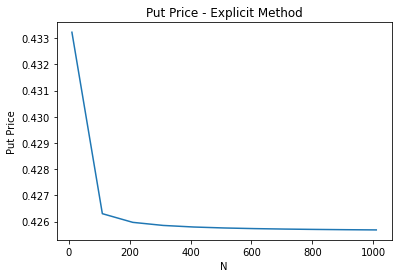

In [208]:
N = pd.DataFrame([10,110,210,310,410,510,610,710,810,910,1010])
put_price_en = pd.DataFrame([0.43322509391778047, 0.4263022482234592, 0.42597123377105883, 
                  0.4258537407200049, 0.42579355394884466, 0.4257569673776529, 
                  0.42573237535929703, 0.4257147101516322, 0.425701406437394, 
                  0.4256910264455501, 0.42568270178943834])
plt.plot(N, put_price_en)
plt.title('Put Price - Explicit Method')
plt.xlabel('N')
plt.ylabel('Put Price')
plt.show()


It appears that the explicit method of the finite difference scheme suffers from
instability problems.

Implicit Scheme

In [45]:
"""
Price a European option by the implicit method
of finite differences.
"""
import numpy as np
import scipy.linalg as linalg
#from FDExplicitEu import FDExplicitEu
class FDImplicitEu(FDExplicitEu):
  def _setup_coefficients_(self):
    self.a = 0.5*(self.r*self.dt*self.i_values -(self.sigma**2)*self.dt*(self.i_values**2))
    self.b = 1 + (self.sigma**2)*self.dt*(self.i_values**2) + self.r*self.dt
    self.c = -0.5*(self.r * self.dt*self.i_values + (self.sigma**2)*self.dt*(self.i_values**2))
    self.coeffs = np.diag(self.a[2:self.M], -1) + np.diag(self.b[1:self.M]) + np.diag(self.c[1:self.M-1], 1)
 
  def _traverse_grid_(self):
    """ Solve using linear systems of equations """
    P, L, U = linalg.lu(self.coeffs)
    aux = np.zeros(self.M-1)
    for j in reversed(range(self.N)):
      aux[0] = np.dot(-self.a[1], self.grid[0, j])
      x1 = linalg.solve(L, self.grid[1:self.M, j+1]+aux)
      x2 = linalg.solve(U, x1)
      self.grid[1:self.M, j] = x2   

Using the same example as with the explicit scheme, we can price an European put option using the implicit scheme:

In [46]:
#from FDImplicitEu import FDImplicitEu
option1 = FDImplicitEu(10, 10, 0.05, 6./12., 0.2, 20, 30,100, False)
print(option1.price())

0.42484132969633526


With varying number of M;

In [116]:
#for M in np.arange(1,100,10):   
M = np.random.choice([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101])
option_i = FDImplicitEu(10, 10, 0.05, 6./12., 0.2, 20, M, 100, False)
print(option_i.price(), M)

0.44332870112491646 81


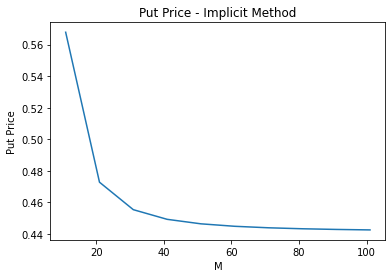

In [209]:
import pandas as pd
M = pd.DataFrame([11,21,31,41,51,61,71,81,91,101])
put_price_im = pd.DataFrame([0.5678114865545101, 0.47282429451933866, 0.4554223849368295, 
                  0.4493107673832888, 0.4464559712909301, 0.44489373111521846, 
                  0.44394635113150305, 0.44332870112491646, 0.4429037183626483, 
                  0.4425988374806681])
plt.plot(M, put_price_im)
plt.title('Put Price - Implicit Method')
plt.xlabel('M')
plt.ylabel('Put Price')
plt.show()

With varying N;

In [149]:
#for N in np.arange(10,1000,100): 
N = np.random.choice([10, 110, 210, 310, 410, 510, 610, 710, 810, 910, 1010])
option_i = FDImplicitEu(10, 10, 0.05, 6./12., 0.2, 20, 30, N, False)
print(option_i.price(), N)    

0.42548148870952207 610


Given the current parameters and input data, it is observed that there are no stability issues with the implicit scheme.

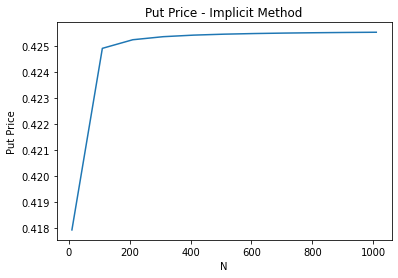

In [210]:
N = pd.DataFrame([10,110,210,310,410,510,610,710,810,910,1010])
put_price_in = pd.DataFrame([0.4179171641776067, 0.4249109647825227, 0.4252424674051111, 
                  0.4253600604379406, 0.4254202835354404, 0.42545688725801606, 
                  0.42548148870952207, 0.42549915965368373, 0.4255124671143255, 
                  0.425522849686862, 0.425531176195869])
plt.plot(N, put_price_in)
plt.title('Put Price - Implicit Method')
plt.xlabel('N')
plt.ylabel('Put Price')
plt.show()

The Crank-Nicolson Scheme

In [56]:
""" Crank-Nicolson method of Finite Differences """
import numpy as np
import scipy.linalg as linalg
#from FDExplicitEu import FDExplicitEu

class FDCnEu(FDExplicitEu):
  def _setup_coefficients_(self):
    self.alpha = 0.25*self.dt*((self.sigma**2)*(self.i_values**2) - self.r*self.i_values)
    self.beta = -self.dt*0.5*((self.sigma**2)*(self.i_values**2) + self.r)
    self.gamma = 0.25*self.dt*((self.sigma**2)*(self.i_values**2) + self.r*self.i_values)
    self.M1 = -np.diag(self.alpha[2:self.M], -1) + np.diag(1-self.beta[1:self.M]) - np.diag(self.gamma[1:self.M-1], 1)
    self.M2 = np.diag(self.alpha[2:self.M], -1) + np.diag(1+self.beta[1:self.M]) + np.diag(self.gamma[1:self.M-1], 1)

  def _traverse_grid_(self):
    """ Solve using linear systems of equations """
    P, L, U = linalg.lu(self.M1)
    for j in reversed(range(self.N)):
      x1 = linalg.solve(L, np.dot(self.M2,self.grid[1:self.M, j+1]))
      x2 = linalg.solve(U, x1)
      self.grid[1:self.M, j] = x2

Using the same examples as with the explicit and implicit methods, we can price
an European put option using the Crank-Nicolson method for different time
point intervals:

In [75]:
#from FDCnEu import FDCnEu
option = FDCnEu(10, 10, 0.05, 6./12., 0.2, 20, 30, 100, False)
print(option.price())

0.4256090855864528


With varying M;

In [255]:
M = np.random.choice([11, 21, 31, 41, 51, 61, 71, 81, 91, 101])
option_c = FDCnEu(10, 10, 0.05, 6./12., 0.2, 20, M, 100, False)
print(option_c.price(), M)

0.44462299536647204 71


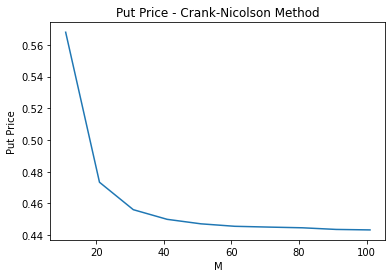

In [292]:
M = pd.DataFrame([11,21,31,41,51,61,71,81,91,101])
put_price_cm = pd.DataFrame([0.5680216778317226, 0.47335761195478576, 0.45604863883867874, 
                  0.4499646050332209, 0.4471220797986385, 0.44556642385610057, 
                  0.44506642385610057, 0.44462299536647204, 0.4435846771535273, 
                  0.44328105134745965])
plt.plot(M, put_price_cm)
plt.title('Put Price - Crank-Nicolson Method')
plt.xlabel('M')
plt.ylabel('Put Price')
plt.show()


With varying N;

In [279]:
#for N in np.arange(10, 1000, 100):
N = np.random.choice([10, 110, 210, 310, 410, 510, 610, 710, 810, 910, 1010])
option_c = FDCnEu(10, 10, 0.05, 6./12., 0.2, 20, 30, N, False)
print(option_c.price(), N)  

0.4256069639935148 1010


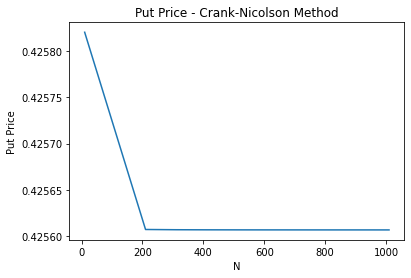

In [281]:
N = pd.DataFrame([10,210,310,410,510,610,710,810,910,1010])
put_price_cn = pd.DataFrame([0.42581984791153044, 0.42560742886211833, 0.42560716595611875, 
                  0.42560707045573276, 0.4256070253693765, 0.42560700057319917, 
                  0.42560698549448167, 0.42560697564703315, 0.425606968863713, 
                  0.4256069639935148])
plt.plot(N, put_price_cn)
plt.title('Put Price - Crank-Nicolson Method')
plt.xlabel('N')
plt.ylabel('Put Price')
plt.show()

From the observed values, the Crank-Nicolson method not only avoids the instability issue seen in the explicit scheme, but also converges faster than both the explicit and implicit methods. The implicit method requires more iterations, or bigger values of $N$, to produce values close to those of the Crank-Nicolson method.

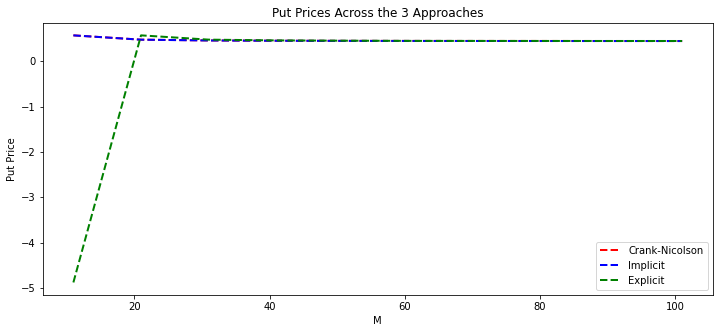

In [293]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(M, put_price_cm, lw=2, color='red', ls='dashed', label='Crank-Nicolson')
plt.plot(M, put_price_im, lw=2, color='blue', ls='dashed', label='Implicit')
plt.plot(M, put_price_em, lw=2, color='green', ls='dashed', label='Explicit')
plt.title('Put Prices Across the 3 Approaches')
plt.xlabel('M')
plt.ylabel('Put Price')
plt.legend()
plt.show()

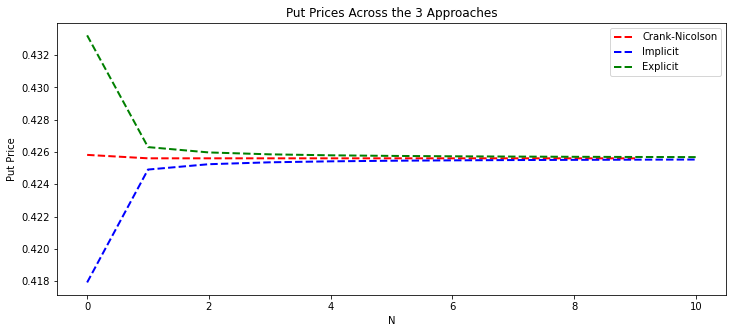

In [289]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(put_price_cn, lw=2, color='red', ls='dashed', label='Crank-Nicolson')
plt.plot(put_price_in, lw=2, color='blue', ls='dashed', label='Implicit')
plt.plot(put_price_en, lw=2, color='green', ls='dashed', label='Explicit')
plt.title('Put Prices Across the 3 Approaches')
plt.xlabel('N')
plt.ylabel('Put Price')
plt.legend()
plt.show()

Analytical solution;

In [303]:
import math
import matplotlib.pyplot as plt
import scipy.stats

def d1(S, K, r, sigma, T):
 return (math.log(S/float(K))+(r+sigma**2/2)*T)/(sigma*math.sqrt(T))

def d2(S, K, r, sigma, T):
 return d1(S, K, r, sigma,T)-(sigma*math.sqrt(T))

def PutOption(S, K, r, sigma, T):
 return (K * math.exp(-r*T) * scipy.stats.norm.cdf(-d2(S, K, r,sigma, T)))-(S * scipy.stats.norm.cdf(-d1(S, K, r, sigma, T))) 

PutOption(10, 10, 0.05, 0.20, 0.5)

0.441971978051388